In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
from pyosrd.schedules import Schedule
schedule = Schedule(10,3)
schedule.df

0         1         2     
     s    e    s    e    s    e
0  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  NaN
6  NaN  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN  NaN  NaN
9  NaN  NaN  NaN  NaN  NaN  NaN

In [4]:
schedule._df.index=[
    "S1",
    "S2",
    "CVG1",
    "T1",
    "S3",
    "CVG2",
    "T2",
    "DVG",
    "A1",
    "A2"
]

In [5]:
schedule

        0         1         2     
        s    e    s    e    s    e
S1    NaN  NaN  NaN  NaN  NaN  NaN
S2    NaN  NaN  NaN  NaN  NaN  NaN
CVG1  NaN  NaN  NaN  NaN  NaN  NaN
T1    NaN  NaN  NaN  NaN  NaN  NaN
S3    NaN  NaN  NaN  NaN  NaN  NaN
CVG2  NaN  NaN  NaN  NaN  NaN  NaN
T2    NaN  NaN  NaN  NaN  NaN  NaN
DVG   NaN  NaN  NaN  NaN  NaN  NaN
A1    NaN  NaN  NaN  NaN  NaN  NaN
A2    NaN  NaN  NaN  NaN  NaN  NaN

In [6]:
schedule.df.at['S1', 0] =  [0, 1]
schedule.df.at['CVG1', 0] = [1, 2]
schedule.df.at['T1', 0] =  [2, 4]
schedule.df.at['CVG2', 0] =  [4, 5]
schedule.df.at['T2', 0] =  [5, 7]
schedule.df.at['DVG', 0] =  [7, 8]
schedule.df.at['A1', 0] =  [8, 9]

schedule.df.at['S2', 2] =  [4, 5]
schedule.df.at['CVG1', 2] = [5, 6]
schedule.df.at['T1', 2] =  [6, 8]
schedule.df.at['CVG2', 2] =  [8, 9]
schedule.df.at['T2', 2] =  [9, 11]
schedule.df.at['DVG', 2] =  [11, 12]
schedule.df.at['A2', 2] =  [12, 13]


schedule.df.at['S3', 1] =  [5,6]
schedule.df.at['CVG2', 1] =  [6, 7]
schedule.df.at['T2', 1] =  [7, 9]
schedule.df.at['DVG', 1] =  [9, 11]
schedule.df.at['A1', 1] =  [11, 12]


/home/renan/RLway/src/pyosrd/schedules/schedules.py:430: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for u, v in zip(self.df.index, self.df.fillna(0).values)


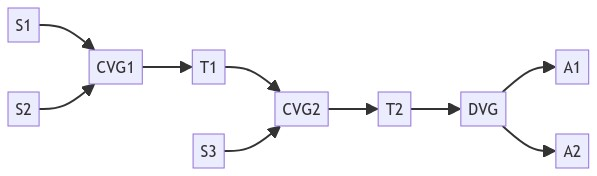

In [7]:
schedule.draw_graph()

<Axes: xlabel='Time'>

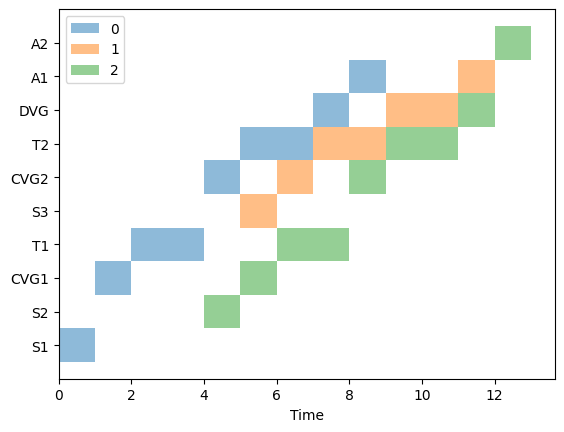

In [8]:
schedule.plot()

In [9]:
from pyosrd.regul_env import RegulEnv

env = RegulEnv(schedule.sort(), stations=['A1', 'A2'])

In [10]:
from typing import Tuple, Union
import numpy as np



/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in 

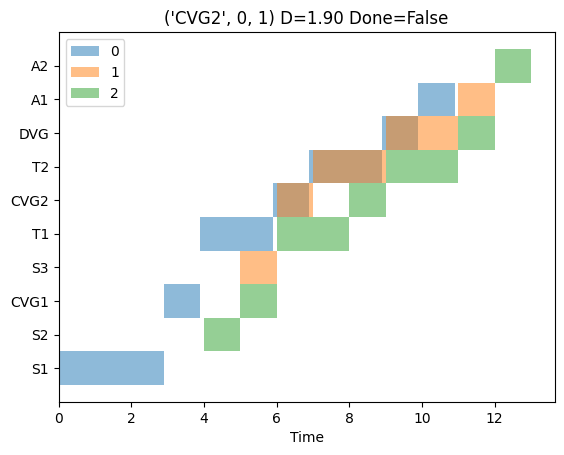

In [11]:
# tests from 0. to 3. on trains 0 & 1

env.reset(delay=1.9, train=0, track_section='S1')
env.render()
plt.title(f"{env.schedule.earliest_conflict()}"
           f" D={env.schedule.total_delay_at_stations(schedule,['A1', 'A2']):.2f}"
           f" Done={env._done}");

/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in 

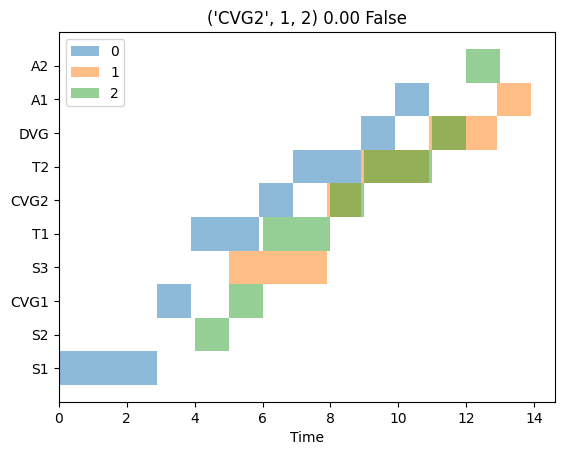

In [12]:
obs, reward, done, _ = env.step(0)
env.render()
plt.title(f"{env.schedule.earliest_conflict()}"
           f" {reward:.2f}"
           f" {done}");